# Activation Functions
In this notebook we will be reviewing a whole lot of activation functions for deep neural network along with their derivatives in order to better understand them. If I'm missing some important one feel free to raise an issue!


Good ressources:
- [Stackexchange](https://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons)
- [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/)

In [51]:
import random
import math
import matplotlib.pyplot as plt


def plot_activation(activation_function, title, min_range=-30, max_range=30):
    '''
        Plot Activation will take an activation function and
        plot its y values in the range -30 to 30
    '''
    activations = [activation_function(i) for i in range(min_range,max_range)]
    plt.plot(activations)
    plt.title(title)
    plt.grid(True)
    plt.show()
    

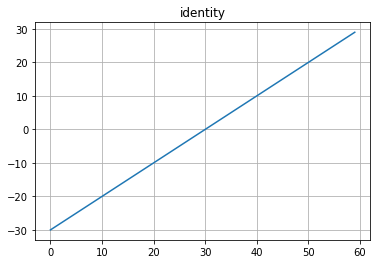

In [52]:
def identity(z):
    '''
        Identity function: input is output
    '''
    return z

plot_activation(identity, "identity")

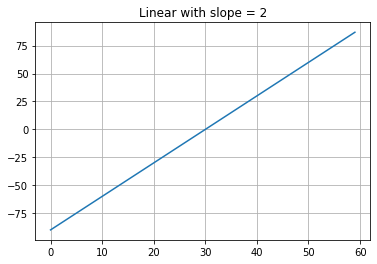

In [53]:
def linear(slope, z):
    '''
        Linear Function: Same as identity except we have a scaling by slope!
    '''
    return slope*z

plot_activation(lambda z: linear(3,z), "Linear with slope = 2")

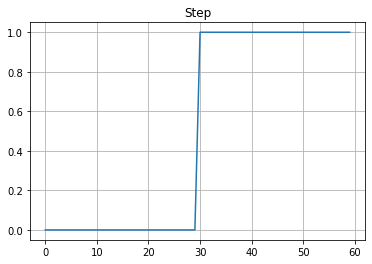

In [54]:
def step(z):
    '''
        Step function: Either return 0 or 1 with a hard threshold at the origin.
    '''
    if z < 0:
        return 0
    return 1

plot_activation(step, "Step")

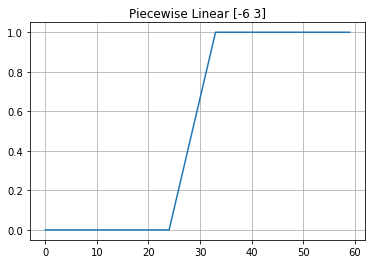

In [55]:
def piecewise_linear(xmin, xmax, z):
    '''
        Piecewise Linear: Same as linear function in the range xmin and xmax, however above and below
        these threshold it saturate at 0 and 1
    '''
    if z < xmin:
        return 0
    
    if z > xmax:
        return 1
    
    slope = 1/(xmax - xmin)
    bias = 1 - slope*xmax
    
    return slope*z + bias

plot_activation(lambda z: piecewise_linear(-6,3,z), "Piecewise Linear [-6 3]")

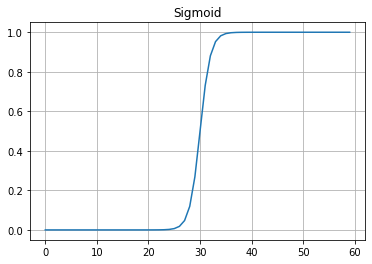

In [56]:
def sigmoid(z):
    '''
        Sigmoid: This is one of the most widely used activation function. It reshape the values between 0 and 1.
    '''
    return 1 / (1 + math.exp(-z))

plot_activation(sigmoid, "Sigmoid")

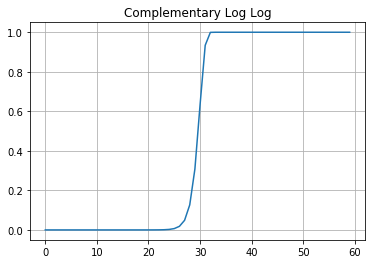

In [57]:
def complementary_log_log(z):
    '''
        Complementary Log Log: Similarly to the Simoid it reshape the values between 0 and 1
    '''
    return 1 - math.exp(-math.exp(z))

plot_activation(complementary_log_log, "Complementary Log Log")

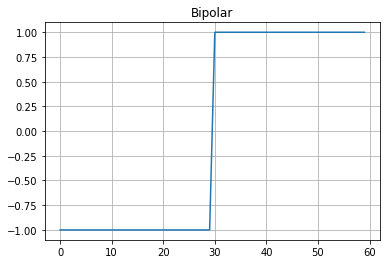

In [58]:
def bipolar(z):
    '''
        Bipolar: This function is similar than the step except it goes from -1 to 1
    '''
    if z < 0:
        return -1
    return 1

plot_activation(bipolar, "Bipolar")

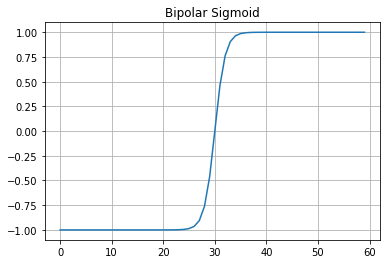

In [59]:
def bipolar_sigmoid(z):
    '''
        Bipolar Sigmoid: This function is the sigmoid, but with a mapping from -1 to 1
    '''
    return (1 - math.exp(-z)) / (1 + math.exp(-z))

plot_activation(bipolar_sigmoid, "Bipolar Sigmoid")

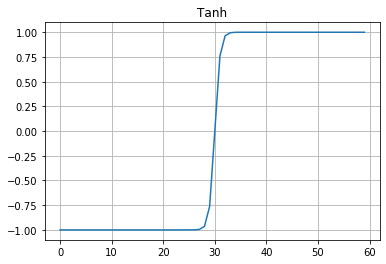

In [60]:
def tanh(z):
    '''
        Tanh: Classical function that is doing a similar mapping than the bipolar sigmoid
    '''
    return math.tanh(z)

plot_activation(tanh, "Tanh")

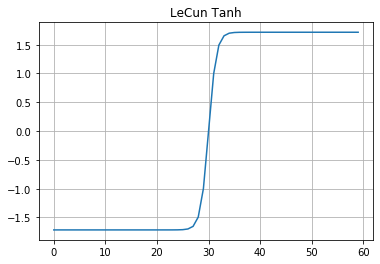

In [61]:
def lecun_tanh(z):
    '''
        LeCun Tanh: This is a modified Tanh function taken from this paper: http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf
        It is scaled differently than tanh
    '''
    return (1.7159*math.tanh((2/3)*z))

plot_activation(lecun_tanh, "LeCun Tanh")

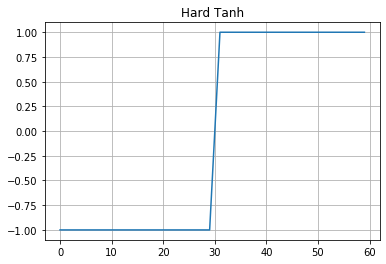

In [62]:
def hard_tanh(z):
    '''
        Hard Tanh: This is like a piecewise linear with a slope similar to the tanh function
    '''
    return max([-1, min([1, z])])

plot_activation(hard_tanh, "Hard Tanh")

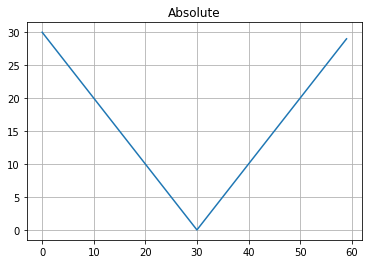

In [63]:
def absolute(z):
    '''
        Absolute: This takes the absolute value of the input, so there is no negative.
    '''
    return abs(z)

plot_activation(absolute, "Absolute")

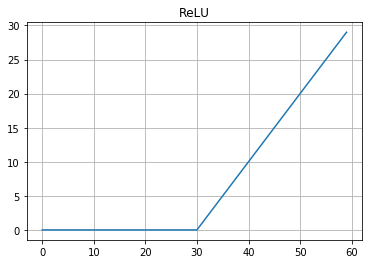

In [64]:
def ReLU(z):
    '''
        ReLU: Rectifier Linear Unit is a linear function with a hard threshold at 0, this lead to dead neurons
    '''
    return max([0, z])

plot_activation(ReLU, "ReLU")

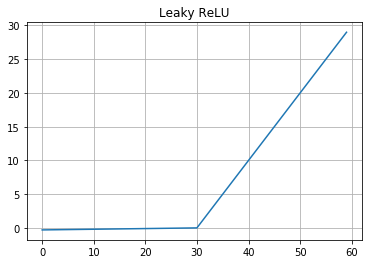

In [65]:
def leaky_ReLU(z):
    '''
        Leaky ReLU: This is the same as ReLU, but without a hard threshold at 0. This prevent dead neurons.
    '''
    return max([0.01*z, z])

plot_activation(leaky_ReLU, "Leaky ReLU")

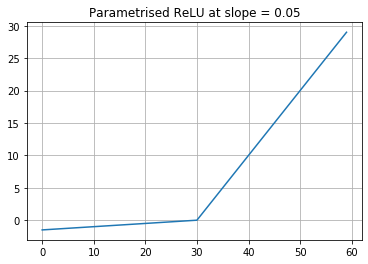

In [66]:
def parametrised_ReLU(slope, z):
    '''
        Parametrised ReLU: This is similar to Leaky ReLU, except that the slope at [-inf 0] is not hard coded to 0.01
    '''
    # Here we need a slope smaller than 1
    assert( slope < 1)
    return max([slope*z, z])

plot_activation(lambda z: parametrised_ReLU(0.05, z), "Parametrised ReLU at slope = 0.05")

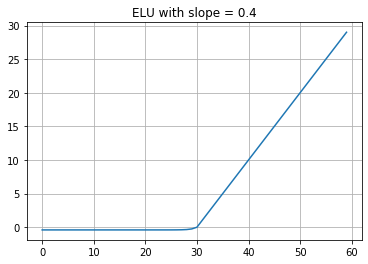

In [67]:
def ELU(slope, z):
    '''
        ELU: This is a variant of leaky ReLU with a exponential slope except of a linear slope
    '''
    if z < 0:
        return slope*(math.exp(z) - 1)
    return z

plot_activation(lambda z: ELU(0.4,z), "ELU with slope = 0.4")

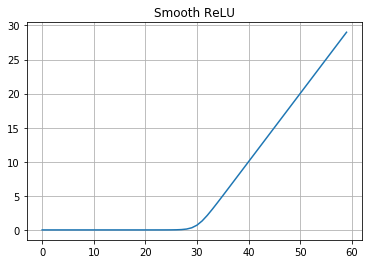

In [68]:
def smooth_ReLU(z):
    '''
        Smooth ReLU: Also called Smooth Max or Soft Plus its yet another variant of ReLU, which doesn't have a 
        linear slope like ReLU.
    '''
    return math.log(1 + math.exp(z))

plot_activation(smooth_ReLU, "Smooth ReLU")

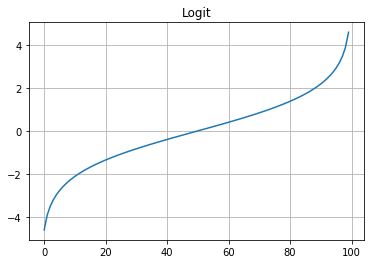

In [82]:
def logit(z):
    '''
        Logit: This one is very different compared to the other ones and map from -inf to inf only in the range ]0,1[
    '''
    return math.log(z / (1 - z))

# We have to do some weird transformation to not get math error as the activation function is not defined
# outside of the bounds ]0,1[
plot_activation(lambda z: logit(abs(z/101) + 0.01), "Logit", min_range=0, max_range=100)

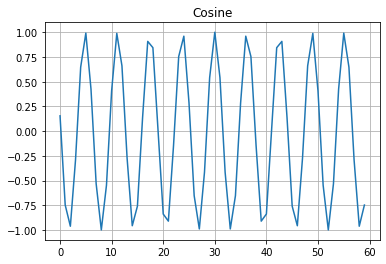

In [83]:
def cosine(z):
    '''
        Cosine: Yes this is actually an activation function see this paper: https://people.eecs.berkeley.edu/~brecht/papers/08.rah.rec.nips.pdf
    '''
    return math.cos(z)

plot_activation(cosine, "Cosine")

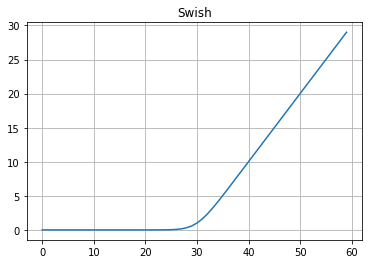

In [87]:
# Swish
def swish(z):
    '''
        Swish: This is similar than ReLU but show better performance on deeper models
    '''
    return z / (1 - math.exp(-z))

# Here we are just making sure we don't hit the 0 point since it is not defined, we use a small offset
plot_activation(lambda z: swish(z+0.01), "Swish")

If I missed some feel free to share them!

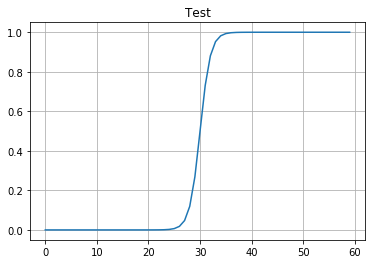

In [92]:
# To define the activation function class we will use ducktyping
# “If it looks like a duck and quacks like a duck, it’s a duck”

class SigmoidActivation():
    
    def activate(self,z):
        return sigmoid(z)
    
    def derivate(self, z):
        return 1-sigmoid(z)
    
sig = SigmoidActivation()
plot_activation(sig.activate, "Sigmoid Activation within Class")